# DeepSeek 

> prompt: for a graduate course on geospatial analysis, write a python code that downloads DEM (Digital Elevation Map) data for the Philippines, say the island of Mindanao, from the internet, loads the tiff file, computes the slope at each point and calculates the SSI (slope stability index)


To create a Python script for downloading DEM data, computing slope, and calculating the Slope Stability Index (SSI) for the island of Mindanao in the Philippines, you can use libraries such as
- `rasterio` for handling geospatial raster data,
- `numpy` for numerical computations, and
- `scipy` for gradient calculations.

Below is a step-by-step guide and the corresponding Python code:

### Step 1: Install Required Libraries
First, ensure you have the necessary libraries installed. You can install them using pip:

```bash
pip install rasterio numpy scipy matplotlib
```

### Step 2: Download DEM Data
You can download DEM data from sources like USGS Earth Explorer or other geospatial data providers. For simplicity, let's assume you have downloaded a GeoTIFF file for Mindanao.


### Explanation:

1. **Loading DEM Data**: The script uses `rasterio` to load the DEM data from a GeoTIFF file. The `transform` and `profile` are also loaded to handle geospatial metadata.

2. **Computing Slope**: The slope is computed using the `numpy.gradient` function, which calculates the gradient of the DEM. The slope is then converted from radians to degrees.

3. **Calculating SSI**: The Slope Stability Index (SSI) is calculated by comparing the slope to a critical slope angle. If the slope exceeds this angle, the SSI is set to 1 (unstable), otherwise 0 (stable).

4. **Plotting Results**: The script plots the DEM, slope, and SSI using `matplotlib`.

5. **Saving SSI**: The SSI map is saved as a new GeoTIFF file using the same profile as the input DEM.

### Notes:
- **Critical Slope Angle**: The critical slope angle is a parameter that can be adjusted based on the specific requirements of your study.
- **Data Sources**: Ensure you have the correct DEM data for Mindanao. You can download DEM data from sources like USGS Earth Explorer, NASA's SRTM, or other geospatial data providers.

This script provides a basic framework for geospatial analysis using Python. You can further customize it based on your specific needs and data.

In [1]:
import rasterio
from rasterio.plot import show
import numpy as np
from scipy.ndimage import sobel
import matplotlib.pyplot as plt

In [2]:
# Load the DEM data
dem_path = './data/n06_e124_1arc_v3.tif'
with rasterio.open(dem_path) as src:
    dem = src.read(1)
    transform = src.transform
    profile = src.profile

### Plotting with `matplotlib`

To display teh DEM, we can simply use matplotlib's `imshow` function.

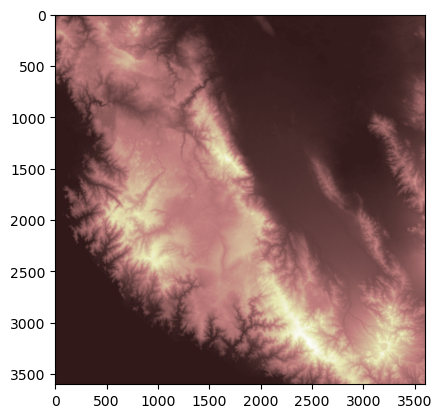

In [8]:
plt.imshow(dem, cmap='pink')
plt.show()

### Plotting with `rasterio` functions

To display specialized images, eg. separating RGB channels in a multispectral image, we can use the `show` function of `raterio.plot` module.

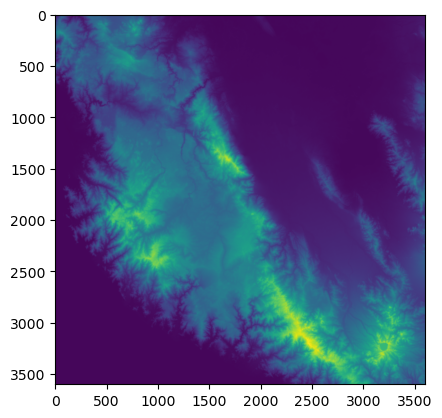

<Axes: >

In [10]:
from rasterio.plot import show
show(dem)

We can add a colobar to show the values of the DEM

<Axes: >

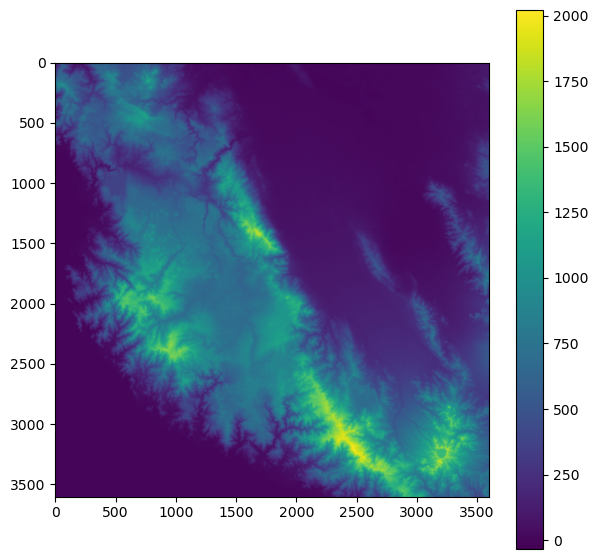

In [32]:
fig, ax = plt.subplots(figsize=(7,7))
image_hidden = ax.imshow(dem)
fig.colorbar(image_hidden, ax=ax)
show(dem, ax=ax)

### Transform PLot

We can also display in the transformed coordinates - latitude and longitude.

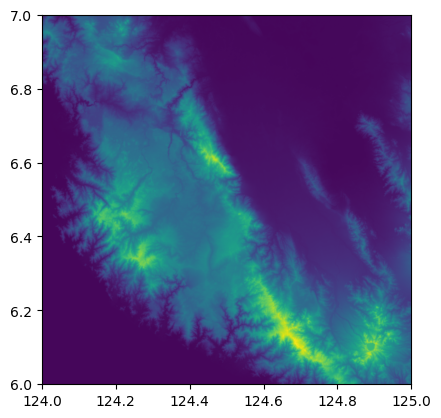

<Axes: >

In [13]:
show(dem, transform=transform)

### Contour Plots

We can plot contours using `show` of `rasterio.plot`.

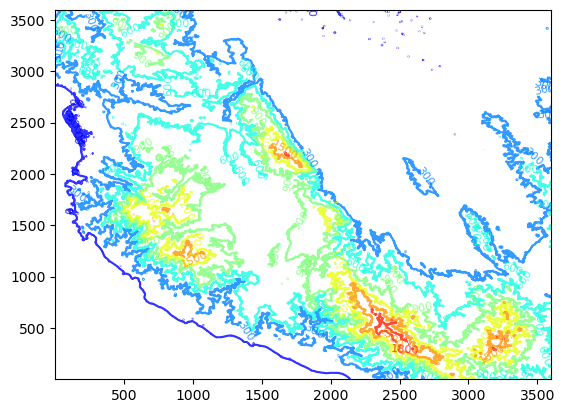

<Axes: >

In [17]:
show(dem, contour=True, cmap='jet')

In [18]:
# Compute the slope
def compute_slope(dem, transform):
    x, y = np.gradient(dem)
    x_resolution = transform[0]
    y_resolution = transform[4]
    slope = np.arctan(np.sqrt(x**2 + y**2)) * (180 / np.pi)
    return slope

slope = compute_slope(dem, transform)

Plot the slope.

<Axes: >

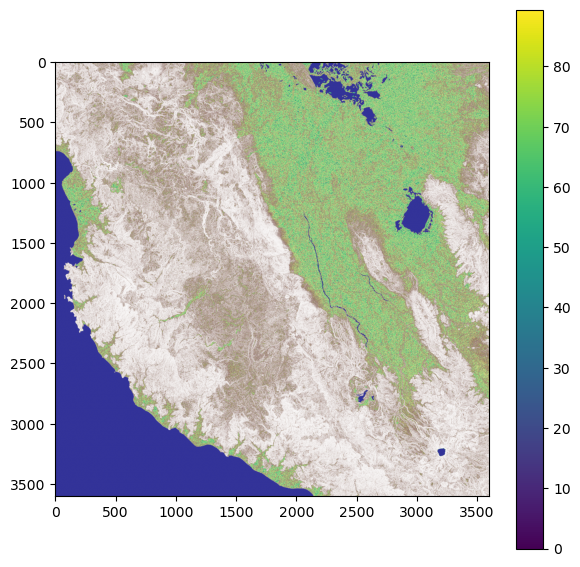

In [34]:
##show(slope, cmap='terrain', colorbar)#, colorbar=True)
fig, ax = plt.subplots(figsize=(7,7))
image_hidden = ax.imshow(slope)
fig.colorbar(image_hidden, ax=ax)
show(slope,  cmap='terrain', ax=ax)

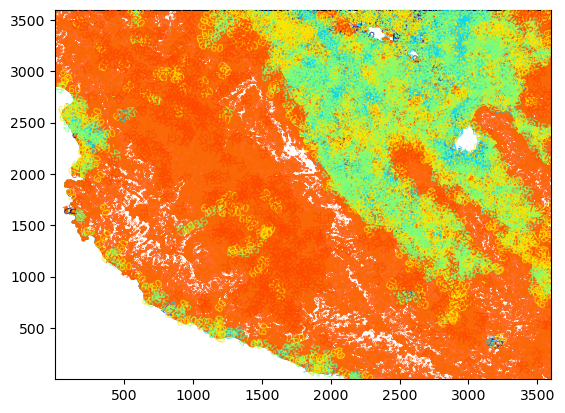

<Axes: >

In [20]:
show(slope, contour=True, cmap='jet') # this can take some time...

In [24]:
# Calculate the Slope Stability Index (SSI)
def calculate_ssi(slope, critical_slope_angle=30):
    ssi = np.where(slope > critical_slope_angle, 1, 0)
    return ssi

critical_slope_angle = 30  # You can adjust this based on your study
ssi = calculate_ssi(slope, critical_slope_angle)

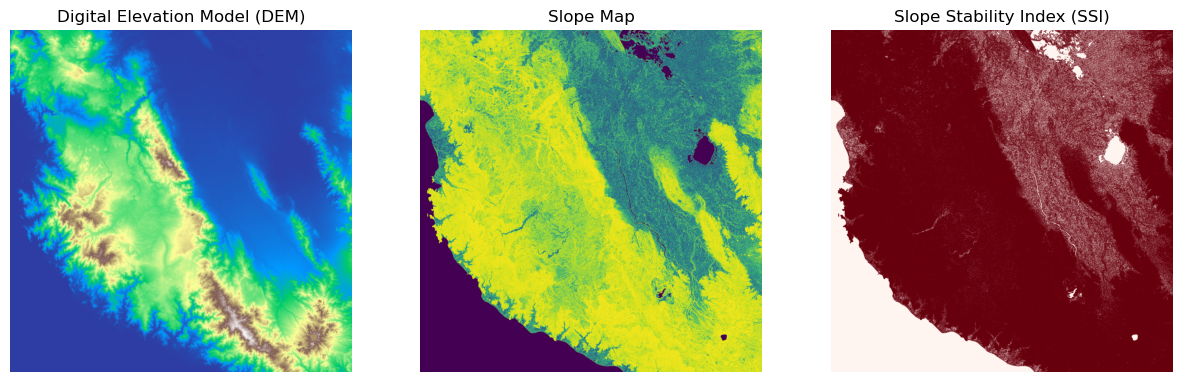

SSI map saved to ssi_output.tif


In [25]:
# Plot the results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot DEM
ax[0].imshow(dem, cmap='terrain')
ax[0].set_title('Digital Elevation Model (DEM)')
ax[0].axis('off')

# Plot Slope
ax[1].imshow(slope, cmap='viridis')
ax[1].set_title('Slope Map')
ax[1].axis('off')

# Plot SSI
ax[2].imshow(ssi, cmap='Reds')
ax[2].set_title('Slope Stability Index (SSI)')
ax[2].axis('off')

plt.show()

# Save the SSI as a new GeoTIFF file
output_path = 'ssi_output.tif'
with rasterio.open(output_path, 'w', **profile) as dst:
    dst.write(ssi.astype(rasterio.float32), 1)

print(f"SSI map saved to {output_path}")

### Exercises

1. Compare the results with those in the `03slope_raster` notebook.
2. Draw conclusions.